# Costarican Household poverty level prediction

Prediksi level kemiskinan di kostarika

In [59]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 138) # untuk set berapa jumlah kolom yang ditampilkan saat memanggil perintah .dtypes dan .head
data=pd.read_csv('D:/Project/Data Science Project/Datasets/Costarica-extreme-poverty/train.csv')

In [60]:
data.head().T

,0,1,2,3,4
Id,ID_279628684,ID_f29eb3ddd,ID_68de51c94,ID_d671db89c,ID_d56d6f5f5
v2a1,190000,135000,NaN,180000,180000
hacdor,0,0,0,0,0
rooms,3,4,8,5,5
hacapo,0,0,0,0,0
v14a,1,1,1,1,1
refrig,1,1,1,1,1
v18q,0,1,0,1,1
v18q1,NaN,1,NaN,1,1
r4h1,0,0,0,0,0


In [61]:
data.shape

(9557, 143)

In [62]:
data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

In [63]:
data['v2a1'].value_counts(bins=3)
c=data['v2a1'].isnull().sum()
print(c)

6860


### Menghilangkan kolom id dan idhogar pada dataset 

In [64]:
data.drop(labels='Id', axis=1,inplace=True)
data.drop(labels='idhogar',axis=1, inplace=True)     

### Menghitung jumlah data yang hilang dari setiap kolom dataset

In [65]:
missing_data=data.isnull()
missing_data.head()
for column in missing_data.columns.values.tolist():
    column1=data[column]
    if column1.isnull().sum() >0: 
        print(column)
        print (missing_data[column].value_counts())
        print("")    

v2a1
True     6860
False    2697
Name: v2a1, dtype: int64

v18q1
True     7342
False    2215
Name: v18q1, dtype: int64

rez_esc
True     7928
False    1629
Name: rez_esc, dtype: int64

meaneduc
False    9552
True        5
Name: meaneduc, dtype: int64

SQBmeaned
False    9552
True        5
Name: SQBmeaned, dtype: int64



### Karena pada kolom v2a1,v18q1,rez_esc jumlah data yang hilang terlalu banyak maka kolom data tersebut  dihilangkan

In [66]:
column_to_drop=['v2a1','v18q1','rez_esc']
data.drop(labels=column_to_drop,axis=1,inplace=True)

### Pada kolom meaneduc dan SQBmeaned data yang hilang sedikit maka data yang hilang akan digantikan dari mean pada kolom tersebut

In [67]:
column_to_mean=['SQBmeaned','meaneduc']
avg1,avg2=data[column_to_mean].astype('float').mean(axis=0)
print(avg1, avg2)

102.58886699019641 9.231522935701435


In [68]:
data['SQBmeaned'].replace(np.nan,avg1,inplace=True)
data['meaneduc'].replace(np.nan,avg2,inplace=True)

In [69]:
data[column_to_mean].isnull().sum()

SQBmeaned    0
meaneduc     0
dtype: int64

### Pengolahan data pada kolom yang terdapat string dan numeric.

kolom-kolom tersebut adalah dependency, edjefe dan edjefa

In [70]:
mixed_data_column=['dependency','edjefe','edjefa']
data[mixed_data_column].dtypes

dependency    object
edjefe        object
edjefa        object
dtype: object

In [71]:
def string_to_number(x):
    if x=='yes':
        x=1
    elif x=='no':
        x=0
    return x    

In [72]:
data['dependency']=data['dependency'].map(string_to_number) # mmengubah data string menjadi numerik (yes=1, no=0)
data['edjefe']=data['edjefe'].map(string_to_number)
data['edjefa']=data['edjefa'].map(string_to_number)
data['dependency']=data['dependency'].astype('float64',inplace=True) # mengubah data menjadi float
data['edjefe']=data['edjefe'].astype('float64',inplace=True) 
data['edjefa']=data['edjefa'].astype('float64',inplace=True) 

In [73]:
data['dependency']=data['dependency'].astype('float64',inplace=True)

In [74]:
data['dependency'].dtypes


dtype('float64')

In [75]:
data['edjefa'].value_counts(bins=3)

(-0.022000000000000002, 7.0]    7973
(7.0, 14.0]                     1193
(14.0, 21.0]                     391
Name: edjefa, dtype: int64

In [76]:
data.shape

(9557, 138)

### Lihat korelasi variabel dengan target


Dapat kita lihat melaui tabel dibawah bahwa kolom elimbasu5 mempunyai korelasi NaN. Sehingga kolom tersebut akan didrop

In [77]:
a=data.corr()['Target'][:]
a


hacdor            -0.191714
rooms              0.226208
hacapo            -0.138008
v14a               0.063382
refrig             0.126792
v18q               0.238864
r4h1              -0.229889
r4h2               0.101253
r4h3              -0.043359
r4m1              -0.253163
r4m2              -0.036959
r4m3              -0.173931
r4t1              -0.316745
r4t2               0.048904
r4t3              -0.147548
tamhog            -0.147642
tamviv            -0.158224
escolari           0.302305
hhsize            -0.147642
paredblolad        0.261274
paredzocalo       -0.079199
paredpreb         -0.099002
pareddes          -0.082923
paredmad          -0.168237
paredzinc         -0.051806
paredfibras       -0.027730
paredother        -0.000629
pisomoscer         0.280284
pisocemento       -0.205439
pisoother          0.021219
pisonatur         -0.044957
pisonotiene       -0.111270
pisomadera        -0.116306
techozinc          0.027652
techoentrepiso     0.019592
techocane         -0

In [78]:
data['elimbasu5'].value_counts()

0    9557
Name: elimbasu5, dtype: int64

In [79]:
data.drop(labels='elimbasu5',axis=1,inplace=True)

In [80]:
data.shape

(9557, 137)

### Drop kolom squares pada dataset

Karena data pada kolom squares merupakan kuadrat dari feature yang sudah ada maka kolom data tersebut kita hilangkan

In [81]:
data.dtypes

hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
techozinc            int64
techoentrepiso       int64
techocane            int64
techootro            int64
c

In [82]:
useless_data=['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']
for a in useless_data:
    data.drop(labels=a,axis=1,inplace=True)

In [83]:
data.shape

(9557, 128)

### Standarisasi Data 

In [84]:
y=data['Target']
X=data.drop(labels='Target',axis=1)

In [85]:
list_kolom=X.columns.values.tolist()
for i in list_kolom:
    print(i)

hacdor
rooms
hacapo
v14a
refrig
v18q
r4h1
r4h2
r4h3
r4m1
r4m2
r4m3
r4t1
r4t2
r4t3
tamhog
tamviv
escolari
hhsize
paredblolad
paredzocalo
paredpreb
pareddes
paredmad
paredzinc
paredfibras
paredother
pisomoscer
pisocemento
pisoother
pisonatur
pisonotiene
pisomadera
techozinc
techoentrepiso
techocane
techootro
cielorazo
abastaguadentro
abastaguafuera
abastaguano
public
planpri
noelec
coopele
sanitario1
sanitario2
sanitario3
sanitario5
sanitario6
energcocinar1
energcocinar2
energcocinar3
energcocinar4
elimbasu1
elimbasu2
elimbasu3
elimbasu4
elimbasu6
epared1
epared2
epared3
etecho1
etecho2
etecho3
eviv1
eviv2
eviv3
dis
male
female
estadocivil1
estadocivil2
estadocivil3
estadocivil4
estadocivil5
estadocivil6
estadocivil7
parentesco1
parentesco2
parentesco3
parentesco4
parentesco5
parentesco6
parentesco7
parentesco8
parentesco9
parentesco10
parentesco11
parentesco12
hogar_nin
hogar_adul
hogar_mayor
hogar_total
dependency
edjefe
edjefa
meaneduc
instlevel1
instlevel2
instlevel3
instlevel4
instl

In [86]:
list_kolom=X.columns.values.tolist()
for i in list_kolom:
    X[i]=(X[i]-X[i].min())/(X[i].max()-X[i].min())


## Applied Machine Learning Model

Pada tahap ini kita akan melakukan menerapkan model machine learning pada datasets. Kita akan mencoba tiga machine learning
model yaitu Logistic Regresion, KNN, dan SVM 

In [87]:
from sklearn.model_selection import train_test_split
# Pembagian data training dan data test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, train_size=4/5, random_state=42)

### 1. Logistic Regression 

In [94]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
solver=['newton-cg','lbfgs']

logistic = LogisticRegression(max_iter=2000)
hyperparameters = dict(C=C, solver=solver)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0,scoring='accuracy')
best_model = clf.fit(X_train, y_train)
                        
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Solver: newton-cg
Best C: 7.742636826811269
Wall time: 18min 3s


In [97]:
%%time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=7.74, solver='newton-cg', max_iter=200)
print("Training Classifier...")
clf.fit(X_train, y_train)
print("Predicting...")
prediction = clf.predict(X_test)
accuracy_LR = accuracy_score(y_test, prediction)
print ('Accuracy:', accuracy_LR)

Training Classifier...
Predicting...
Accuracy: 0.6746861924686193
Wall time: 7.51 s


### 2. KNN 

In [100]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=[3,4,5,7,9]
# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors)
clf = GridSearchCV(KNeighborsClassifier(),hyperparameters, cv=5, verbose=0,scoring='accuracy')
best_model = clf.fit(X_train, y_train)
print('Best Neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Neighbors: 3
Wall time: 9min 12s


In [101]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
print("Training Classifier...")
clf.fit(X_train, y_train)
print("Predicting...")
prediction = clf.predict(X_test)
accuracy_KNN = accuracy_score(y_test, prediction)
print ('Accuracy:', accuracy_KNN)

# Menghitung nilai akurasi menggunakan metode Cross Validation 

#print(cross_val_score(clf, X, y, cv=5)) # something wrong with this 

Training Classifier...
Predicting...
Accuracy: 0.7698744769874477
Wall time: 7.56 s


### 3. SVM 

In [102]:
%%time
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


clf=OneVsRestClassifier(LinearSVC())
print("Training Classifier...")
clf.fit(X_train, y_train)
print("Predicting...")
prediction = clf.predict(X_test)
accuracy_SVM = accuracy_score(y_test, prediction)
print ('Accuracy:', accuracy_SVM)


Training Classifier...
Predicting...
Accuracy: 0.6678870292887029
Wall time: 12.6 s


### 4. Random Forest

In [105]:
%%time
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as meab


clf = RFC(random_state=42)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_RF = accuracy_score(y_test, prediction)
print ('Accuracy:', accuracy_RF)


Accuracy: 0.9142259414225942
Wall time: 416 ms


## Kesimpulan 

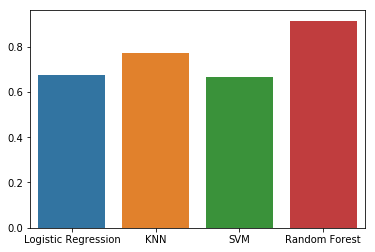

In [109]:
import seaborn as sns
x=['Logistic Regression','KNN','SVM','Random Forest']
y=[accuracy_LR,accuracy_KNN,accuracy_SVM,accuracy_RF]
ax=sns.barplot(x=x,y=y,)

Tingkat Akurasi sistem tertinggi dicapai ketika kita menggunakan model Random Forest dengan akurasi sebesar 91%